**Objective** 
* Understanding what content is available in different countries 

* Does Netflix has more focus on TV Shows than movies in recent years.

* Identifying similar content by matching text-based features 

* Network analysis of Actors / Directors and find interesting insights


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [110]:
pip install --upgrade requests

Looking in indexes: https://pypi.org/simple, https://nexus3.sqcorp.co/repository/pypi-square-general/simple
     |████████████████████████████████| 62 kB 2.4 MB/s eta 0:00:011
     |████████████████████████████████| 121 kB 8.3 MB/s eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0
Note: you may need to restart the kernel to use updated packages.


In [126]:
import ssl
ssl_context = ssl.create_default_context()
ssl_context.set_ciphers('DEFAULT@SECLEVEL=1')

In [2]:
raw_data = pd.read_csv('netflix_titles.csv')

In [3]:
raw_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
raw_data.show_id.nunique()

8807

## Understanding what content is available in different countries 

In [6]:
#Exploring the type column
raw_data.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [7]:
#how many countries are there in the dataset
raw_data.country.nunique()

748

In [8]:
raw_data.groupby(by=['country'])['show_id'].nunique()

country
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1
Name: show_id, Length: 748, dtype: int64

### Movies

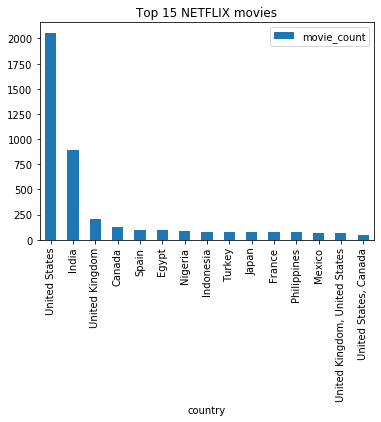

In [9]:
#which are the top 10 countries for highest number of movies
movies = raw_data.loc[raw_data['type']=='Movie']
top_country_movie = movies.groupby(by='country',as_index = False).agg({"show_id":"count"})
top_country_movie.rename(columns={"show_id":"movie_count"},inplace=True)
top_country_movie.sort_values(by="movie_count",ascending=False, inplace=True)
top_15_countries = top_country_movie.head(15)
top_15_countries.plot(kind='bar',x="country",title="Top 15 NETFLIX movies")

### TV Shows

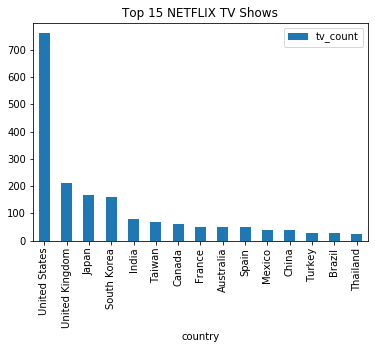

In [10]:
#which are the top 10 countries for highest number of TV Shows
tv_shows = raw_data.loc[raw_data['type']=='TV Show']
top_country_tv_shows = tv_shows.groupby(by='country',as_index = False).agg({"show_id":"count"})
top_country_tv_shows.rename(columns={"show_id":"tv_count"},inplace=True)
top_country_tv_shows.sort_values(by="tv_count",ascending=False, inplace=True)
top_15_countries_tv_show = top_country_tv_shows.head(15)
top_15_countries_tv_show.plot(kind='bar',x="country",title="Top 15 NETFLIX TV Shows")

## Does Netflix has more focus on TV Shows than movies in recent years?

In [11]:
#lets check the data before plotting
raw_data.groupby(by='date_added').agg({"show_id":"count"})

,show_id
date_added,
"April 15, 2018",1
"April 16, 2019",1
"April 17, 2016",1
"April 20, 2017",1
"April 4, 2017",1
...,...
"September 9, 2016",1
"September 9, 2018",1
"September 9, 2019",1


In [12]:
#changing the date_added column to timestamp from object
raw_data['date_added'] = pd.to_datetime(raw_data['date_added'])

In [13]:
time_agg = raw_data.groupby(by = [raw_data['date_added'].dt.to_period('Y'),raw_data['type']] ).agg({"show_id":"count"}).reset_index()

Text(0.5, 1.0, 'Counts over time')

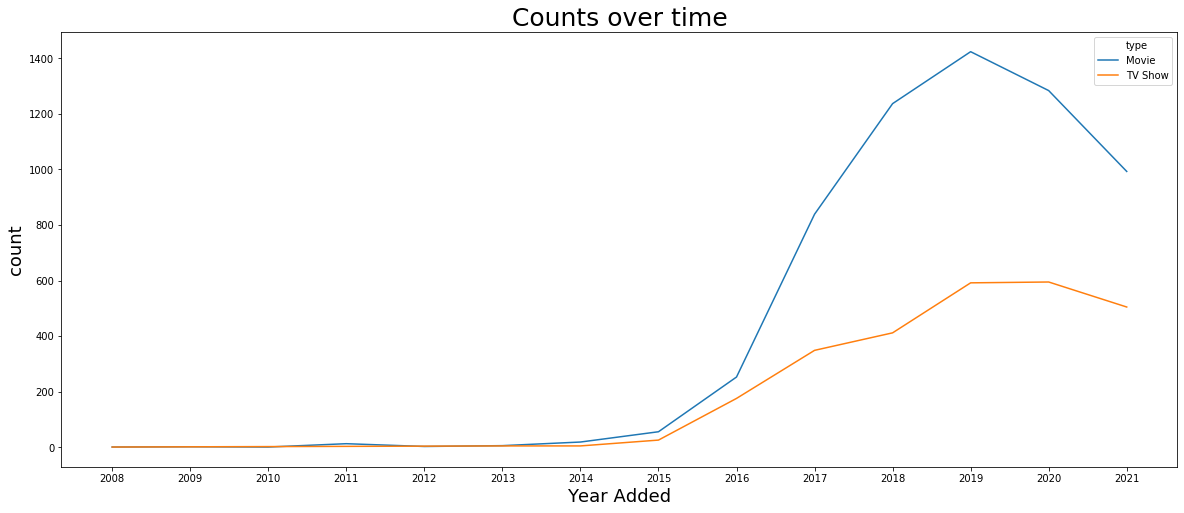

In [14]:
plot_data = time_agg
plot_data['year_added'] = plot_data['date_added'].astype(str)
plt.figure(figsize=(20,8))
sns.lineplot(x="year_added",y="show_id",hue="type",data=plot_data)
plt.ylabel("count",size=18)
plt.xlabel("Year Added", size=18)
plt.title("Counts over time",size=25)


### Netflix has not produced more TV shows than movies recently

In [15]:
raw_data['description'][0]

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

## Recommender System

In [16]:
# Are there Nulls in the data?
raw_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [106]:
# Let us replace NULLs by ""(blank) instead of deleting the rows since other
# columns for the rown can help in recommendation
cleaned_df = raw_data.fillna("")

#### The columns considered for recommendation are
* type
* country
* release_year
* rating
* director
* listed_in
* description

In [18]:
features = ['title','type','country','release_year','rating','director','listed_in','description']
features_df = cleaned_df[features]

In [19]:
features_df.head()

,title,type,country,release_year,rating,director,listed_in,description
0,Dick Johnson Is Dead,Movie,United States,2020,PG-13,Kirsten Johnson,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,TV Show,South Africa,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,TV Show,,2021,TV-MA,Julien Leclercq,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,TV Show,,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,TV Show,India,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Data Prep

In [20]:
#Remove spaces and convert to lower
def clean_data(x):
    return str.lower(x.replace(" ",""))

In [21]:
for feature in features:
    features_df[feature] = features_df[feature].apply(str)
    features_df[feature] = features_df[feature].apply(clean_data)
    

/Users/ajiths/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ajiths/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
features_df.head()

,title,type,country,release_year,rating,director,listed_in,description
0,dickjohnsonisdead,movie,unitedstates,2020,pg-13,kirstenjohnson,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,tvshow,southafrica,2021,tv-ma,,"internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,tvshow,,2021,tv-ma,julienleclercq,"crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,tvshow,,2021,tv-ma,,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,tvshow,india,2021,tv-ma,,"internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [24]:
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
cleaned_df['description'] = cleaned_df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(cleaned_df['description'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

In [25]:
import sklearn
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Creating a "bag of words" for rows

In [26]:
def create_soup(x):
    return x['title']+' '+x['type']+' '+x['country']+' '+x['release_year']+' '+x['rating']+' '+x['director']+' '+x['listed_in']+' '+x['description']


In [27]:
features_df['soup'] = features_df.apply(create_soup,axis=1)

/Users/ajiths/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(features_df['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [29]:
features_df = features_df.reset_index()
indices = pd.Series(features_df.index, index = features_df['title'])

In [30]:
def get_recommendations(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return cleaned_df['title'].iloc[movie_indices]

In [31]:
get_recommendations('Kota Factory',cosine_sim2)

397            Feels Like Ishq
3463           College Romance
571             Generation 56k
1589        Bhaag Beanie Bhaag
2917            Taj Mahal 1989
3293             Little Things
6265    Beauty and the Bitches
847         Mad for Each Other
3466              Girls Hostel
6228         Bangkok Bachelors
Name: title, dtype: object

In [32]:
get_recommendations('Feels Like Ishq',cosine_sim2)

4                 Kota Factory
571             Generation 56k
6265    Beauty and the Bitches
847         Mad for Each Other
6228         Bangkok Bachelors
6430           Castle of Stars
242      Comedy Premium League
287             I Need Romance
577            Masameer County
897          Use For My Talent
Name: title, dtype: object

In [33]:
get_recommendations('Generation 56k',cosine_sim2)

397            Feels Like Ishq
4                 Kota Factory
6265    Beauty and the Bitches
847         Mad for Each Other
6228         Bangkok Bachelors
6430           Castle of Stars
242      Comedy Premium League
287             I Need Romance
577            Masameer County
897          Use For My Talent
Name: title, dtype: object

In [34]:
cleaned_df['description'][3]

'Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.'

# Using ChatGPT to predict movie Genre

In [35]:
pip install requests


Looking in indexes: https://pypi.org/simple, https://nexus3.sqcorp.co/repository/pypi-square-general/simple
Note: you may need to restart the kernel to use updated packages.


In [36]:
import requests

In [143]:
def chatGPT(text):
  model_engine = "text-davinci-003"
  endpoint = f"https://api.openai.com/v1/engines/{model_engine}/completions"

  headers = {
  "Content-Type": "application/json",
  "Authorization": "Bearer", #key hidden
  }
  data = { 
  "prompt": "Predict the genre based on decription. The response has to be a less than two words and return only genre",
  "max_tokens": 100,
  "temperature": 0.2,
  }
    
  data["prompt"] += f"\nInput Text: {text}"
  

  response = requests.post(endpoint, headers=headers, json=data)
  output = ""

  if "choices" in response.json():
     output = response.json()["choices"][0]["text"].strip(" \n")

  return output

#### Restricting to 4000 rows for using free version

In [128]:
trunc_df = cleaned_df.iloc[:4000]

##### validating the response

In [136]:
chatGPT(trunc_df.loc[60,'description'])

'Adventure Fantasy'

In [137]:
trunc_df.loc[60,'description']

'When Naruto is sent to recover a missing nin, the rogue manages to send him 20 years into the past, where he unites with his father to battle evil.'

##### Apply to all the TV shows and movies

In [138]:
trunc_df.loc[:, 'genre'] = trunc_df.apply(lambda row:chatGPT(row['description']),axis=1)

/Users/ajiths/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ajiths/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [142]:
trunc_df.iloc[0:12]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Comedy Drama
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Drama/Mystery
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Action Thriller
3,s4,TV Show,Jailbirds New Orleans,,,,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Reality TV
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Comedy Drama
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",,2021-09-24 00:00:00,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Religious Drama
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",,2021-09-24 00:00:00,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Answer: Fantasy Adventure
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24 00:00:00,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Historical Drama
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24 00:00:00,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Answer: Reality TV
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24 00:00:00,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Drama.


In [144]:
trunc_df.iloc[220:242]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
220,s221,TV Show,Family Reunion,,"Loretta Devine, Tia Mowry-Hardrict, Anthony Al...",United States,2021-08-26 00:00:00,2021,TV-PG,4 Seasons,"Kids' TV, TV Comedies",When the McKellan family moves from Seattle to...,
221,s222,Movie,"Bob Ross: Happy Accidents, Betrayal & Greed",Joshua Rofé,Bob Ross,,2021-08-25 00:00:00,2021,TV-14,93 min,Documentaries,Bob Ross brought joy to millions as the world’...,
222,s223,TV Show,Clickbait,Brad Anderson,"Zoe Kazan, Betty Gabriel, Adrian Grenier, Phoe...",,2021-08-25 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, TV Dramas, TV Mysteries",When family man Nick Brewer is abducted in a c...,
223,s224,TV Show,John of God: The Crimes of a Spiritual Healer,"Mauricio Dias, Tatiana Villela",,,2021-08-25 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Idolized medium João Teixeira de Faria rises t...,
224,s225,TV Show,Motel Makeover,,,,2021-08-25 00:00:00,2021,TV-14,1 Season,"International TV Shows, Reality TV","Amid project pitfalls and a pandemic, besties-...",Reality TV
225,s226,TV Show,Open Your Eyes,,"Maria Wawreniuk, Ignacy Liss, Michał Sikorski,...",,2021-08-25 00:00:00,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries","After a tragic accident, an amnesiac teen trie...",
226,s227,TV Show,Post Mortem: No One Dies in Skarnes,,"Kathrine Thorborg Johansen, Elias Holmen Søren...",,2021-08-25 00:00:00,2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",She's back from the dead and has a newfound th...,
227,s228,Movie,Really Love,Angel Kristi Williams,"Kofi Siriboe, Yootha Wong-Loi-Sing, Michael Ea...",United States,2021-08-25 00:00:00,2020,TV-MA,95 min,"Dramas, Independent Movies, Romantic Movies",A rising Black painter tries to break into a c...,
228,s229,Movie,The November Man,Roger Donaldson,"Pierce Brosnan, Luke Bracey, Olga Kurylenko, E...","United States, United Kingdom",2021-08-25 00:00:00,2014,R,108 min,Action & Adventure,An ex-CIA agent emerges from retirement to pro...,
229,s230,Movie,The Old Ways,Christopher Alender,"Brigitte Kali Canales, Andrea Cortes, Julia Ve...",United States,2021-08-25 00:00:00,2020,TV-MA,90 min,Horror Movies,A reporter visits her birthplace in Veracruz f...,
